In [1]:
import warnings
warnings.filterwarnings('ignore')

# Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

Составим первое впечатление о данных. Импортируем библиотеку `pandas`, считаем датасеты и сохраним их в переменных с одноименными названиями. Выведем на экран первые 20 строк и общую информацию каждой таблицы.

In [2]:
import pandas as pd
calls = pd.read_csv('/datasets/calls.csv')
display(calls.info())
calls.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


В данной таблице указана информация о звонках, данные представлены на 202607 строках в 4 столбцах. Названия столбцов указаны корректно, в данных нет пропусков. Есть нулевые значения в столбце `duration`, согласно описанию в данных это не ошибки, а пропущенные звонки.

Значения столбцов согласно описанию:
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Согласно описанию, деньги/предоплаченные минуты за разговор списываются с первой секунды каждой новой минуты, поэтому для удобства подсчёта времени разговоров и суммы трат в дальнейшейм лучше будет привести столбец `duration` к целочисленному типу с округлением вверх. 
Столбец `call_date`лучше привести к формату даты и времени.

In [3]:
users = pd.read_csv('/datasets/users.csv')
print(users.info())
users.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


В данной таблице указана информация о пользователях, данные представлены на 500 строках в 8 столбцах. Названия столбцов указаны корректно, пропуски есть только в столбце `churn_date`, это означает что пользователи с пропущенными значениями этого столбца продолжали пользоваться тарифом на момент выгрузки.

Значения столбцов согласно описанию:

* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

Столбцы `churn_date` и `reg_date` лучше привести к формату даты и времени.

In [4]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице представлена информация о тарифах. Названия столбцов указаны корректно.

Значения столбцов согласно описанию:
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


Продублирую информацию из описания чтобы сразу проверить, всё ли указано верно:

Тариф «Смарт».
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра».
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Данные в таблице и описании совпадают, можно переходить дальше к следующей таблице:

In [5]:
internet = pd.read_csv('/datasets/internet.csv')
print(internet.info())
internet.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


В данной таблице указана информация о интернет-сессиях пользователей, данные представлены на 149396 строках в 5 столбцах.   
Столбец `	Unnamed: 0	` сразу же бросается в глаза - видимо, он появился в следствии ошибки при выгрузке и дублирует индексы, от него лучше избавиться.

Значения столбцов согласно описанию:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Названия остальных столбцов указаны корректно, пропуски в данных отсутствуют. <br/> Также на 11 строке в столбце с объёмом потраченного трафика указано нулевое значение, в дальнейшем необходимо изучить количество таких значений в датасете.<br/>   Стоблец `session_date` лучше привести к формату даты и времени

In [6]:
messages = pd.read_csv('/datasets/messages.csv')
print(messages.info())
messages.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


В данной таблице указана информация о интернет-сессиях пользователей, данные представлены на 123036 строках в 3 столбцах.   
Названия колонок указаны корректно. В данных нет пропусков  
Столбец `message_date` лучше привести к формату даты и времени.

Значения столбцов согласно описанию:

* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

### Вывод

В таблицах — данные о поведении пользователей двух тарифов.  
 

Можно утверждать, что, данных достаточно для проверки гипотез. Явных пропусков не выявлено.

Некорректно написано название одного столбца, во всех столбцах с датами лучше поменять тип данных. Найден один лишний столбец, возникший, скорее всего, при ошибке выгрузки.  

Необходимо более детально изучить данные и избавиться от проблем, прежде чем приступить к анализу.

## Предобработка и подготовка данных

Перед анализом изучим каждую таблицу более детально на предмет ошибок и исправим уже выявленные на этапе ознакомления.  
Сразу же после этого будем группировать данные по месяцам, т.к. важный параметр исследования - это выручка за месяц.

### Звонки

Начнём с таблицы `calls`. 

Так как звонки тарифицируются за минуту и секунды округляются в большую сторону, так же следует поступить со значениями в столбце с длительностью разговоров. Округлим значения в большую сторону и заменим тип данных на `int`. Для этого нам понадобится библиотека `numpy`.

In [7]:
import numpy as np
calls['duration']=calls['duration'].apply(np.ceil)
calls['duration']=calls['duration'].astype('int')
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


Код отработал корректно.

Теперь заменим тип данных в столбце  `call_date`.

In [8]:
calls['call_date']=pd.to_datetime(calls['call_date'])
calls.dtypes

id                   object
call_date    datetime64[ns]
duration              int64
user_id               int64
dtype: object

Теперь можно добавить столбец с указанием месяца, в котором совершались звонки.

In [9]:
calls['month']= calls['call_date'].dt.month
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


Код отработал корректно, теперь на основе данных создадим новую таблицу, где для каждого пользователя посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам:


In [10]:
calls_per_month = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
calls_per_month

count      sum
              duration duration
user_id month                  
1000    5           22      159
        6           43      172
        7           47      340
        8           52      408
        9           58      466
...                ...      ...
1498    10          41      247
1499    9            9       70
        10          68      449
        11          74      612
        12          69      492

[3174 rows x 2 columns]

Заменим заголовки количества звонков и минут за месяц на более наглядные:

In [11]:
calls_per_month.columns = ['calls_total', 'duration_total']
calls_per_month

calls_total  duration_total
user_id month                             
1000    5               22             159
        6               43             172
        7               47             340
        8               52             408
        9               58             466
...                    ...             ...
1498    10              41             247
1499    9                9              70
        10              68             449
        11              74             612
        12              69             492

[3174 rows x 2 columns]

Таблица готова к использованию, переходим к следующей

### Пользователи

Проверим значения столбцав с указанием тарифа, города и возрастом абонентов:

In [12]:
print(users['tariff'].unique())
print(users['city'].sort_values().unique())
users['age'].sort_values().unique()

['ultra' 'smart']
['Архангельск' 'Астрахань' 'Балашиха' 'Барнаул' 'Белгород' 'Брянск'
 'Владивосток' 'Владикавказ' 'Владимир' 'Волгоград' 'Волжский' 'Вологда'
 'Воронеж' 'Грозный' 'Екатеринбург' 'Иваново' 'Ижевск' 'Иркутск' 'Казань'
 'Калининград' 'Калуга' 'Кемерово' 'Киров' 'Кострома' 'Краснодар'
 'Красноярск' 'Курган' 'Курск' 'Липецк' 'Магнитогорск' 'Махачкала'
 'Москва' 'Мурманск' 'Набережные Челны' 'Нижневартовск' 'Нижний Новгород'
 'Нижний Тагил' 'Новокузнецк' 'Новороссийск' 'Новосибирск' 'Омск'
 'Оренбург' 'Орёл' 'Пенза' 'Пермь' 'Петрозаводск' 'Подольск'
 'Ростов-на-Дону' 'Рязань' 'Самара' 'Санкт-Петербург' 'Саранск' 'Саратов'
 'Севастополь' 'Смоленск' 'Сочи' 'Ставрополь' 'Стерлитамак' 'Сургут'
 'Тамбов' 'Тверь' 'Тольятти' 'Томск' 'Тула' 'Тюмень' 'Улан-Удэ'
 'Ульяновск' 'Уфа' 'Хабаровск' 'Химки' 'Чебоксары' 'Челябинск' 'Череповец'
 'Чита' 'Якутск' 'Ярославль']


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Значения в столбцах корректные, переходим к замене типа данных:

In [13]:
users['churn_date']=pd.to_datetime(users['churn_date'])
users['reg_date']=pd.to_datetime(users['reg_date'])
users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

In [14]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Таблица готова к дальнейшей работе, переходим к следующей.

### Интернет-траффик

In [15]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Уберём ненужный столбец `Unnamed: 0`, дублирующий индексы. Для этого перезапишем таблицу со всеми столбцами, кроме него:

In [16]:
internet = internet[['id', 'mb_used', 'session_date', 'user_id']]
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Посмотрим сколько нулевых значений содержится в столбце `mb_used`:

In [17]:
len(internet.query('mb_used==0'))

19598

'Нулевых' подключений оказалось около 13%. Эти значения можно объяснить ошибками подключения к сети. Нулевые значения можно не удалять, т.к. на интересующий нас параметр - количество израсходованного трафика за месяц, они не повлияют.

Теперь переведём значения столбца `session_date` в формат даты и времени: 

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.dtypes

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

Тарификация за интернет-сессии также идёт с округлением до гигабайта к большему значению, но уже в рамках месяца. Поэтому сначала посчитаем сумму трафика в мегабайтах за месяц для каждого пользователя, а потом уже округлим получившиеся значения до гигабайт.   
В начале также создадим столбец с указанием месяца выхода в интернет:

In [19]:
internet['month'] = internet['session_date'].dt.month
internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [64]:
internet_per_month = internet.pivot_table(index=['user_id', 'month'], values = 'mb_used', aggfunc='sum')
internet_per_month

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

Теперь переведём мегабайты в гигабайты с округлением вверх и запишем в новый столбец. Также переведём тип данных этого столбца в целочисленный:

In [21]:
internet_per_month['gb_total'] = (internet_per_month['mb_used']/1024).apply(np.ceil)
internet_per_month['gb_total'] = internet_per_month['gb_total'].astype('int')
internet_per_month

mb_used  gb_total
user_id month                    
1000    5       2253.49         3
        6      23233.77        23
        7      14003.64        14
        8      14055.93        14
        9      14568.91        15
...                 ...       ...
1498    10     20579.36        21
1499    9       1845.75         2
        10     17788.51        18
        11     17963.31        18
        12     13055.58        13

[3203 rows x 2 columns]

Осталось перевести заголовки второго уровня в обычные для удобства работы в дальнейшем

In [22]:
internet_per_month = internet_per_month.reset_index(col_level=True)
internet_per_month

,user_id,month,mb_used,gb_total
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
...,...,...,...,...
3198,1498,10,20579.36,21
3199,1499,9,1845.75,2
3200,1499,10,17788.51,18
3201,1499,11,17963.31,18


Таблица готова к работе, переходим к  сообщениям.

### СМС

In [23]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Приведём значения столбца `message_date` к формату даты и времени:

In [24]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

Создадим столбец с указанием месяца отправки сообщения:

In [25]:
messages['month'] = messages['message_date'].dt.month
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


Создадим новую таблицу с группировкой отправленных абонентами сообщений по месяцам: 

In [26]:
messages_per_month = messages.pivot_table(index=['user_id', 'month'], values = 'id', aggfunc='count')
messages_per_month

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

Изменим название столбца `id` в более понятный для дальнейшей работы:

In [27]:
messages_per_month.columns = ['messages']
messages_per_month

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

Переведём заголовки второго уровня в обычные

In [28]:
messages_per_month = messages_per_month.reset_index(col_level=True)
messages_per_month

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Таблица готова к работе, переходим к последней таблице - тарифы.

### Тарифы

In [29]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для удобства запишем название тарифа также как и в таблице `users`:

In [30]:
tariffs = tariffs.rename(columns = {'tariff_name':'tariff'})

Так как тарификация идёт в гигабайтах, в дальнейшем будет удобнее использовать это значение, поэтому сразу переведём МБ в ГБ и запишем это значение в новом столбце:

In [31]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


Таблица готова к работе, можно приступать к объединению данных из разных источников.

### Объединием таблицы

Для дальнейшего анализа нам понадобится объединённая таблица со столбцами: количества сообщений, длительности звонков, количества интернет-трафика по каждому абоненту за месяц, город абонента, а также стоблцы с указанием тарифа, абонетской платы за него и платы за перерасход по звонкам, сообщениям и интернету. А также количество звонков, гб и смс, входящих в пакет тарифа.
Для этого создадим новую таблицу и соединим в ней все эти значения в  методом `merge`. В качестве параметра `how`, укажем `outer`, чтобы собрать все значения.

In [32]:
#Соединяем звонки и интернет-трафик с разбивкой по месяцам:
df = calls_per_month.reset_index().merge(internet_per_month[['user_id', 'gb_total','month']], on=['user_id', 'month'], how='outer')
df

,user_id,month,calls_total,duration_total,gb_total
0,1000,5,22.0,159.0,3.0
1,1000,6,43.0,172.0,23.0
2,1000,7,47.0,340.0,14.0
3,1000,8,52.0,408.0,14.0
4,1000,9,58.0,466.0,15.0
...,...,...,...,...,...
3209,1489,8,NaN,NaN,11.0
3210,1489,9,NaN,NaN,17.0
3211,1489,10,NaN,NaN,20.0
3212,1489,11,NaN,NaN,18.0


In [33]:
#Подтягиваем данные из таблицы с пользователями:
df = df.merge(users[['city', 'user_id', 'tariff']], on='user_id', how='outer')
df

,user_id,month,calls_total,duration_total,gb_total,city,tariff
0,1000,5.0,22.0,159.0,3.0,Краснодар,ultra
1,1000,6.0,43.0,172.0,23.0,Краснодар,ultra
2,1000,7.0,47.0,340.0,14.0,Краснодар,ultra
3,1000,8.0,52.0,408.0,14.0,Краснодар,ultra
4,1000,9.0,58.0,466.0,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,20.0,Санкт-Петербург,smart
3212,1489,11.0,NaN,NaN,18.0,Санкт-Петербург,smart
3213,1489,12.0,NaN,NaN,17.0,Санкт-Петербург,smart
3214,1128,NaN,NaN,NaN,NaN,Волжский,ultra


In [34]:
#Подтягиваем сообщения за месяц:
df = df.merge(messages_per_month[['user_id', 'messages', 'month']], on=['user_id', 'month'], how='outer')
df

,user_id,month,calls_total,duration_total,gb_total,city,tariff,messages
0,1000,5.0,22.0,159.0,3.0,Краснодар,ultra,22.0
1,1000,6.0,43.0,172.0,23.0,Краснодар,ultra,60.0
2,1000,7.0,47.0,340.0,14.0,Краснодар,ultra,75.0
3,1000,8.0,52.0,408.0,14.0,Краснодар,ultra,81.0
4,1000,9.0,58.0,466.0,15.0,Краснодар,ultra,57.0
...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,20.0,Санкт-Петербург,smart,21.0
3212,1489,11.0,NaN,NaN,18.0,Санкт-Петербург,smart,20.0
3213,1489,12.0,NaN,NaN,17.0,Санкт-Петербург,smart,35.0
3214,1128,NaN,NaN,NaN,NaN,Волжский,ultra,NaN


In [35]:
#Повторяем процедуру с информацией о тарифных планах:




,user_id,month,calls_total,duration_total,gb_total,city,tariff,messages,rub_per_minute,rub_per_message,rub_per_gb,rub_monthly_fee,minutes_included,gb_per_month_included,messages_included
0,1000,5.0,22.0,159.0,3.0,Краснодар,ultra,22.0,1,1,150,1950,3000,30.0,1000
1,1000,6.0,43.0,172.0,23.0,Краснодар,ultra,60.0,1,1,150,1950,3000,30.0,1000
2,1000,7.0,47.0,340.0,14.0,Краснодар,ultra,75.0,1,1,150,1950,3000,30.0,1000
3,1000,8.0,52.0,408.0,14.0,Краснодар,ultra,81.0,1,1,150,1950,3000,30.0,1000
4,1000,9.0,58.0,466.0,15.0,Краснодар,ultra,57.0,1,1,150,1950,3000,30.0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,17.0,Санкт-Петербург,smart,32.0,3,3,200,550,500,15.0,50
3212,1489,10.0,NaN,NaN,20.0,Санкт-Петербург,smart,21.0,3,3,200,550,500,15.0,50
3213,1489,11.0,NaN,NaN,18.0,Санкт-Петербург,smart,20.0,3,3,200,550,500,15.0,50
3214,1489,12.0,NaN,NaN,17.0,Санкт-Петербург,smart,35.0,3,3,200,550,500,15.0,50


Таблица собрана. Теперь посчитаем помесячную выручку с каждого пользователя. <br/>  Для этого напишем функцию и применим, которая считает плату за перерасходы (если они есть), суммирует их с абонентской платой за месяц и запишем это в новый столбец с выручкой:

In [36]:
def revenue(data):
    #Записываем сохраняем абонентскую плату по тарифу:
    monthly_fee = data['rub_monthly_fee']
    
    #Записываем перерасход по интернету:
    overdraft_gb = (data['gb_total'] - data['gb_per_month_included']) * data['rub_per_gb']
    
    #Если перерасход отрицательный, значит клиент не использовал пакет - обнуляем значение
    if overdraft_gb<0:
        overdraft_gb = 0
        
    #Повторяем логику для минут:    
    overdraft_minutes = (data['duration_total'] - data['minutes_included']) * data['rub_per_minute']
    if overdraft_minutes<0:
        overdraft_minutes=0
        
    #И сообщений:     
    overdraft_messages = (data['messages'] - data['messages_included']) * data['rub_per_message']
    if overdraft_messages<0:
        overdraft_messages=0
        
    #Считаем итоговую выручку для абонента-складываем абон.плату и перерасходы:    
    total = monthly_fee + overdraft_gb + overdraft_minutes + overdraft_messages
        
    return total
    

df['revenue']= df.apply(revenue, axis=1)
df

,user_id,month,calls_total,duration_total,gb_total,city,tariff,messages,rub_per_minute,rub_per_message,rub_per_gb,rub_monthly_fee,minutes_included,gb_per_month_included,messages_included,revenue
0,1000,5.0,22.0,159.0,3.0,Краснодар,ultra,22.0,1,1,150,1950,3000,30.0,1000,1950.0
1,1000,6.0,43.0,172.0,23.0,Краснодар,ultra,60.0,1,1,150,1950,3000,30.0,1000,1950.0
2,1000,7.0,47.0,340.0,14.0,Краснодар,ultra,75.0,1,1,150,1950,3000,30.0,1000,1950.0
3,1000,8.0,52.0,408.0,14.0,Краснодар,ultra,81.0,1,1,150,1950,3000,30.0,1000,1950.0
4,1000,9.0,58.0,466.0,15.0,Краснодар,ultra,57.0,1,1,150,1950,3000,30.0,1000,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,17.0,Санкт-Петербург,smart,32.0,3,3,200,550,500,15.0,50,NaN
3212,1489,10.0,NaN,NaN,20.0,Санкт-Петербург,smart,21.0,3,3,200,550,500,15.0,50,NaN
3213,1489,11.0,NaN,NaN,18.0,Санкт-Петербург,smart,20.0,3,3,200,550,500,15.0,50,NaN
3214,1489,12.0,NaN,NaN,17.0,Санкт-Петербург,smart,35.0,3,3,200,550,500,15.0,50,NaN


Я проверил несколько значений с превышением лимитов, код отработал корректно. 

Проверим, есть ли нулевые значения в новом столбце:

In [37]:
df.query('revenue.isna()')

,user_id,month,calls_total,duration_total,gb_total,city,tariff,messages,rub_per_minute,rub_per_message,rub_per_gb,rub_monthly_fee,minutes_included,gb_per_month_included,messages_included,revenue
49,1024,10.0,7.0,79.0,4.0,Санкт-Петербург,ultra,NaN,1,1,150,1950,3000,30.0,1000,NaN
50,1024,11.0,157.0,1146.0,43.0,Санкт-Петербург,ultra,NaN,1,1,150,1950,3000,30.0,1000,NaN
51,1024,12.0,136.0,949.0,36.0,Санкт-Петербург,ultra,NaN,1,1,150,1950,3000,30.0,1000,NaN
67,1049,3.0,55.0,403.0,7.0,Москва,ultra,NaN,1,1,150,1950,3000,30.0,1000,NaN
68,1049,4.0,76.0,528.0,6.0,Москва,ultra,NaN,1,1,150,1950,3000,30.0,1000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,17.0,Санкт-Петербург,smart,32.0,3,3,200,550,500,15.0,50,NaN
3212,1489,10.0,NaN,NaN,20.0,Санкт-Петербург,smart,21.0,3,3,200,550,500,15.0,50,NaN
3213,1489,11.0,NaN,NaN,18.0,Санкт-Петербург,smart,20.0,3,3,200,550,500,15.0,50,NaN
3214,1489,12.0,NaN,NaN,17.0,Санкт-Петербург,smart,35.0,3,3,200,550,500,15.0,50,NaN


549 значений - это достаточно много. Видимо рассчёт не отрабатывает если хоть одно значение пропущено. Заменим пропуски в четырёх столбцах нулями и повторим процедуру:

In [38]:
df[['gb_total','calls_total', 'messages','duration_total']] = df[['gb_total','calls_total', 'messages','duration_total']].fillna(0)
df['revenue']= df.apply(revenue, axis=1)
print(df['revenue'].isna().sum())
df

0


,user_id,month,calls_total,duration_total,gb_total,city,tariff,messages,rub_per_minute,rub_per_message,rub_per_gb,rub_monthly_fee,minutes_included,gb_per_month_included,messages_included,revenue
0,1000,5.0,22.0,159.0,3.0,Краснодар,ultra,22.0,1,1,150,1950,3000,30.0,1000,1950.0
1,1000,6.0,43.0,172.0,23.0,Краснодар,ultra,60.0,1,1,150,1950,3000,30.0,1000,1950.0
2,1000,7.0,47.0,340.0,14.0,Краснодар,ultra,75.0,1,1,150,1950,3000,30.0,1000,1950.0
3,1000,8.0,52.0,408.0,14.0,Краснодар,ultra,81.0,1,1,150,1950,3000,30.0,1000,1950.0
4,1000,9.0,58.0,466.0,15.0,Краснодар,ultra,57.0,1,1,150,1950,3000,30.0,1000,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,0.0,0.0,17.0,Санкт-Петербург,smart,32.0,3,3,200,550,500,15.0,50,950.0
3212,1489,10.0,0.0,0.0,20.0,Санкт-Петербург,smart,21.0,3,3,200,550,500,15.0,50,1550.0
3213,1489,11.0,0.0,0.0,18.0,Санкт-Петербург,smart,20.0,3,3,200,550,500,15.0,50,1150.0
3214,1489,12.0,0.0,0.0,17.0,Санкт-Петербург,smart,35.0,3,3,200,550,500,15.0,50,950.0


Таблица готова к анализу.

### Вывод

* Столбцы с датами во всех таблицах были приведены к формату даты и времени.
* Посчитано количество звонков, сообщений, интернета и выручки за месяц для каждого абонента. Секунды и мегабайты округлены до минут и ГБ согласно тарификации. 
* Создана таблица со всеми необходимыми для дальнейшего анализа параметрами из всех имеющихся таблиц.
* Ошибки были найдены только в нулевых интернет-сессиях в таблице `internet`. Эти значения не были заменены, т.к. на формирование суммы трафика за месяц они не оказали влияния.
* Во время соединения данных по некоторым значениям выявились пропуски - видимо пользователи не пользовались услугами в эти месяца. Пропуски были заменены нулями.


Расчёты произведены, можно начинать исследовательский анализ данных.

## Анализ и описание данных

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишем распределения.

In [39]:
#Импортируем модуль Pyplot и библиотеки Matlotlib:
import matplotlib.pyplot as plt

# Создадим переменные для пользователей каждого тарифа:
smart = df.query('tariff=="smart"')
ultra = df.query('tariff=="ultra"')

Для начала посмотрим, сколько наблюдений относится к каждому тарифу:

In [40]:
print(len(smart))
len(ultra)

2230


986

Данные по тарифу Smart преобладают в более чем два раза, что ожидаемо - т.к. этот тариф значительно дороже.

Вернёмся к распределениям:

Начнём с телефонных разговоров: посмотрим на распределения звонков и количества минут в месяц.

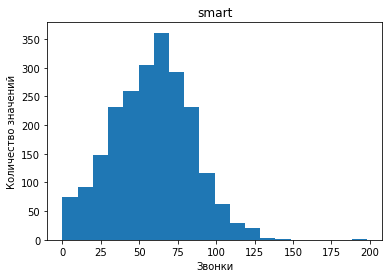

Показатели тарифа Smart
Среднее количество звонков в месяц для абонента: 58.437219730941706
Дисперсия по показателю: 674.1070932087625
Стандартное отклонение по показателю: 25.963572427706527


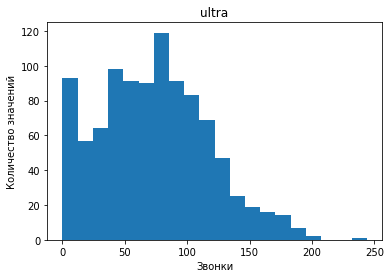

Показатели тарифа Ultra
Среднее количество звонков в месяц для абонента: 73.3184584178499
Дисперсия по показателю: 1932.1949279764417
Стандартное отклонение по показателю: 43.956739278254496


In [41]:
#Строим гистограммы:
smart['calls_total'].plot(kind='hist', bins = 20)
plt.title('smart')
plt.xlabel('Звонки')
plt.ylabel('Количество значений')
plt.show()

#Считаем среднее, стандартное отклонение, дисперсию и выводим на экран:
print('Показатели тарифа Smart')
print('Среднее количество звонков в месяц для абонента:', smart['calls_total'].mean())
print('Дисперсия по показателю:', smart['calls_total'].var())
print('Стандартное отклонение по показателю:', smart['calls_total'].std())

#Повторяем шаги для пользователей тарифа ultra:
ultra['calls_total'].plot(kind='hist', bins = 20)
plt.title('ultra')
plt.xlabel('Звонки')
plt.ylabel('Количество значений')
plt.show()


print('Показатели тарифа Ultra')
print('Среднее количество звонков в месяц для абонента:', ultra['calls_total'].mean())
print('Дисперсия по показателю:', ultra['calls_total'].var())
print('Стандартное отклонение по показателю:', ultra['calls_total'].std())

---
Выборка по тарифу Ultra имеет более высокое среднее - на 20% выше, стандартное отклонение - на 41% больше, и, соответственно, дисперсию - почти в три раза больше чем у тарифа Smart.  
Большее стандартное отклонение и дисперсия говорят о большем разбросе данных, которые можно увидеть на гистограммах: у распределения тарифа Ultra длинный хвост справа - до более чем 200 минут в месяц против около 150 у тарифа Smart, не считая выбросов, которые тоже больше у тарифа Ultra.  
Также у Ultra пропорционально большее количество нулевых и маленьких значений, т.е. таких, где абоненты этого тарифа совершали до 25 звонков в месяц, либо не совершали вообще.
Пик значений на гистограмме тарифа Smart приходится примерно на 60 звонков, у тарифа Ultra примерно на 85-90.  
Гистограмма тарифа Smart болльше напоминает нормальное распределение, немного сдвинутое влево.  
По показателям и гистограммам этих выборок можно сказать что, как и ожидалось, абоненты тарифа Ультра делают в среднем больше звонков, однако и доля тех, кто звонит мало или не звонит вообще  также значительная большая. 

Посмотрим на распределения количества минут разговоров за месяца - отличается ли оно от количества звонков?

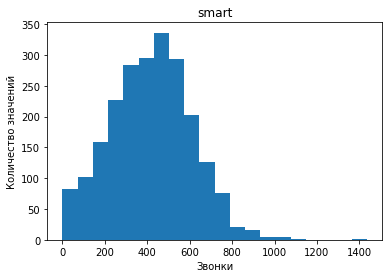

Показатели тарифа Smart
Среднее количество минут разговора в месяц для абонента: 417.747533632287
Дисперсия по показателю: 36281.39383644458
Стандартное отклонение по показателю: 190.4767540579285


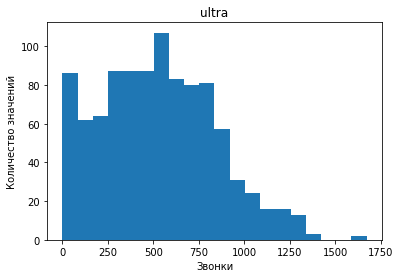

Показатели тарифа Ultra
Среднее количество минут разговора в месяц для абонента: 526.0892494929006
Дисперсия по показателю: 101052.49354928387
Стандартное отклонение по показателю: 317.8875485911392


In [42]:
#Строим гистограммы:
smart['duration_total'].plot(kind='hist', bins = 20)
plt.title('smart')
plt.xlabel('Звонки')
plt.ylabel('Количество значений')
plt.show()

#Считаем среднее, стандартное отклонение, дисперсию и выводим на экран:
print('Показатели тарифа Smart')
print('Среднее количество минут разговора в месяц для абонента:', smart['duration_total'].mean())
print('Дисперсия по показателю:', smart['duration_total'].var())
print('Стандартное отклонение по показателю:', smart['duration_total'].std())

#Повторяем шаги для пользователей тарифа ultra:
ultra['duration_total'].plot(kind='hist', bins = 20)
plt.title('ultra')
plt.xlabel('Звонки')
plt.ylabel('Количество значений')
plt.show()


print('Показатели тарифа Ultra')
print('Среднее количество минут разговора в месяц для абонента:', ultra['duration_total'].mean())
print('Дисперсия по показателю:', ultra['duration_total'].var())
print('Стандартное отклонение по показателю:', ultra['duration_total'].std())

Разница в показателях и внешний вид гистограмм очень похожи: среднее также больше примерно на 21% у тарифа Ultra и страндартное отклонение больше примерно на те же 40%.
Особенности гистограм также характерные для распределений по звонкам справедливы и тут, поэтому и вывод можно повторить: 
абоненты тарифа Ультра делают в среднем разговаривают дольше, однако и доля тех, чьи разговоры занимают мало времени или абонентов, не совершающих звонки вообще по сравнению с пиковыми значениями ощутимо больше, чем у тарифа Smart.
Так же можно добавить что в среднем пользователь обоих тарифов не выговаривает количество минут в пакете, при чём пользователь тарифа Ultra находится сильно дальше от этой границы - длительность его разговоров почти в 6 раз меньше.

Посмотрим как обстоят дела с интернетом:

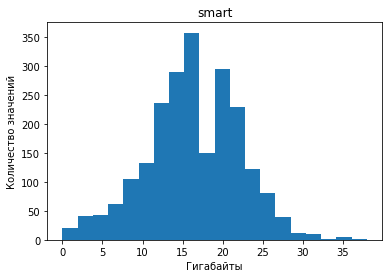

Показатели тарифа Smart
Среднее количество гигабайт трафика в месяц для абонента: 16.32152466367713
Дисперсия по показателю: 33.133453035506285
Стандартное отклонение по показателю: 5.7561665225657155


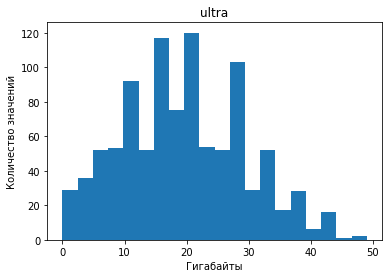

Показатели тарифа Ultra
Среднее количество гигабайт трафика в месяц для абонента: 19.474645030425965
Дисперсия по показателю: 97.37854429011234
Стандартное отклонение по показателю: 9.868056763624352


In [43]:
#Строим гистограммы:
smart['gb_total'].plot(kind='hist', bins = 20)
plt.title('smart')
plt.xlabel('Гигабайты')
plt.ylabel('Количество значений')
plt.show()

#Считаем среднее, стандартное отклонение, дисперсию и выводим на экран:
print('Показатели тарифа Smart')
print('Среднее количество гигабайт трафика в месяц для абонента:', smart['gb_total'].mean())
print('Дисперсия по показателю:', smart['gb_total'].var())
print('Стандартное отклонение по показателю:', smart['gb_total'].std())

#Повторяем шаги для пользователей тарифа ultra:
ultra['gb_total'].plot(kind='hist', bins = 20)
plt.title('ultra')
plt.xlabel('Гигабайты')
plt.ylabel('Количество значений')
plt.show()


print('Показатели тарифа Ultra')
print('Среднее количество гигабайт трафика в месяц для абонента:', ultra['gb_total'].mean())
print('Дисперсия по показателю:', ultra['gb_total'].var())
print('Стандартное отклонение по показателю:', ultra['gb_total'].std())

---

Среднее количество использованных гигабайт трафика у абонентов тарифа Ultra больше абонентов Smart примерно на 17 процентов.
Стандартное отклонение больше примерно на 42%, дисперсия больше в три раза. Что также говорит о большем разбросе данных по выборке тарифа Ultra. 

По гистограммам виден более длинный хвост вправо у тарифа Ultra, а также более неоднородное распределение значений по этому тарифу в сравнении с тарифом Smart - гистограмма тарифа Ultra показывает большое количество пиков, в том время как тариф Smart распределн по значениям гораздо более равномерно.  
Пик на гистограмме приходится примерно на 16 ГБ, что совпадает со средним. Осталные два практически одинаковых пика значений приходятся примерно на 14 и 22 ГБ. На гистограмме тарифа Ultra пик приходится на примерно 21ГБ, затем практически такой же на примерно 16-17ГБ и третий примерно на 28 ГБ в месяц.

Можно сделать вывод что в среднем пользователи тарифа Ultra тратят больше трафика, хотя и разброс по значениям больше.  
Также стоить отметить что в среднем пользователи тарифа Smart превышают бесплатный лимит ГБ, заложенный в тарифе на 2ГБ(согласно тарификации), а абоненты Ultra расходуют его примерно на две трети.

Посмотрим на распределения значений по сообщениям:

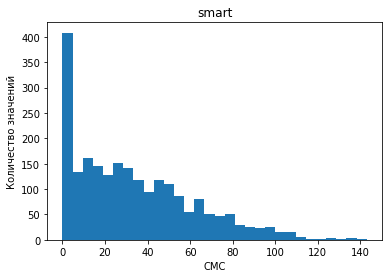

Показатели тарифа Smart
Среднее количество сообщений в месяц для абонента: 33.36905829596412
Дисперсия по показателю: 796.9552557301129
Стандартное отклонение по показателю: 28.230395954185852


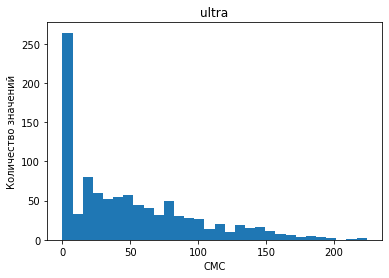

Показатели тарифа Ultra
Среднее количество сообщений месяц для абонента: 49.31338742393509
Дисперсия по показателю: 2285.4174246558414
Стандартное отклонение по показателю: 47.80603962530092


In [44]:
#Строим гистограммы:
smart['messages'].plot(kind='hist', bins = 30)
plt.title('smart')
plt.xlabel('СМС')
plt.ylabel('Количество значений')
plt.show()

#Считаем среднее, стандартное отклонение, дисперсию и выводим на экран:
print('Показатели тарифа Smart')
print('Среднее количество сообщений в месяц для абонента:', smart['messages'].mean())
print('Дисперсия по показателю:', smart['messages'].var())
print('Стандартное отклонение по показателю:', smart['messages'].std())

#Повторяем шаги для пользователей тарифа ultra:
ultra['messages'].plot(kind='hist', bins = 30)
plt.title('ultra')
plt.xlabel('СМС')
plt.ylabel('Количество значений')
plt.show()


print('Показатели тарифа Ultra')
print('Среднее количество сообщений месяц для абонента:', ultra['messages'].mean())
print('Дисперсия по показателю:', ultra['messages'].var())
print('Стандартное отклонение по показателю:', ultra['messages'].std())

---

Среднее количесво сообщений в месяц у абонентов тарифа Ultra больше приммерно на 32%.
Стандартное отклонение больше примерно на 41%, дисперсия больше в три раза. Что также говорит о большем разбросе данных по выборке тарифа Ultra. На гистограмме это видно - у тарифа Ultra более длинный правый хвост.   
На обоих графиках ярковыраженный пик приходится на нулевое значение, соответсвтенно очень большое количетсво абонентов обоих тарифов вообще не отправляют СМС.
В целом графики по виду очень похожи и по обоим можно сделать одинаковый вывод: чем больше значение количества сообщений, отправленных за месяц, тем меньше наблюдений по этому значению.  
По средним значениям можно сказать что пользователи обычно не используют лимит сообщений в месяц, что неудивительно, т.к. текстовое общение с каждым годом приобретает форму мессенджеров даже среди старших возрастных групп.

### Вывод

* В среднем пользователю тарифа Smart нужно 418 минут разговора, 17 ГБ интернета и 34 сообщения в месяц. Пользователю тарифа Ultra: 527 минут, 20 ГБ и 50 сообщения соответственно.
* В среднем пользователь тарифа Smart использует больше интернета, чем включено в тариф, по остальным параметрам абоненты обычно не выходят за рамки предоплаченных пакетов.
* Разброс начений в распределениях тарифа Ultra больше. 
* Нужно помнить, что данных по месяцам по тарифу Ultra, хотя и достаточное количество, но всё же более чем в два раза меньшее чем, по Smart, соответственно поведение среднего абонента этого тарфиа из генеральной совокупности может быть описано хуже, чем абонента тарифа Smart. Разброс значений так же может быть не такой сильный по этой причине.

## Проверка гипотез

Основная цель этого исследования проверить две гипотезы: 
* Средняя выручка по абонентам двух тарифов различается.
* Средняя выручка пользователей из Москвы и других городов также различна.

Нулевые гипотезы сформулируем так:
* Средняя выручка пользователей двух исследуемых выборок равна. 

По скольку при проверке обоих гипотез нам нужно будет сравнить средние из двух выборок оба раза применим метод`scipy.stats.ttest_ind()`.   
Поскольку этот тест работает со средним, необходимо перед ним проверить выборки на выбросы:

count    2230.000000
mean     1289.641704
std       818.370799
min       550.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64


3773.71

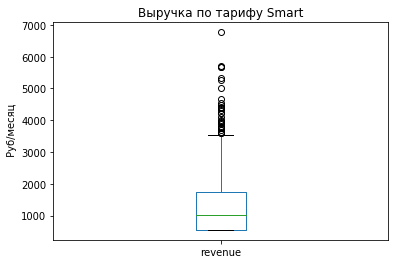

In [45]:
smart['revenue'].plot(kind='box')
plt.ylabel(' Руб/месяц')
plt.title('Выручка по тарифу Smart')
print(smart['revenue'].describe())
smart['revenue'].quantile(0.99)

99% выборки лежит в пределах границы значения 3773.71 рубля/месяц. Максимальное значение почти в два раза больше - 6770.  
На графике верхний ус показывает чуть ниже значения чем метод квантиля. Отсечём выбрасы по значению метода,перезапишем табоицу в пределах нормальных значений и посмотрим, на сколько уменьшились среднее и стандартное отклонение:

In [46]:
smart = smart.query('revenue<=3773.71')
smart['revenue'].describe()

count    2207.000000
mean     1254.719982
std       743.357235
min       550.000000
25%       550.000000
50%      1009.000000
75%      1750.000000
max      3773.000000
Name: revenue, dtype: float64

Среднее уменьшилось всего на 3%, зато стандартное отклонение уменьшилось на 10% - неплохо для жертвый всего в 1% значений. Теперь повторим процедуру с выборкой по тарифу Ultra:

In [47]:
print(ultra['revenue'].describe())
ultra['revenue'].quantile(0.99)

count     986.000000
mean     2070.030426
std       376.015578
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64


3772.499999999997

Перезапишем таблицу и посмотрим на среднее и стандартное отклонение:

In [48]:
ultra = ultra.query('revenue<3772.5')
ultra['revenue'].describe()

count     976.000000
mean     2049.129098
std       314.082726
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      3750.000000
Name: revenue, dtype: float64

Стандартное отклонение снизилось почти на 17 процентов, хотя среднее и снизилось незначительно. 

Теперь можно передавать выборки методу. Поскольку они разного размера, передадим параметру `equal_var` значение `False`. Значение `alpha` выберем 0.05. 

In [49]:
from scipy import stats as st

results = st.ttest_ind(smart['revenue'], ultra['revenue'], equal_var=False)

alpha = .05 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.088237718377e-311
Отвергаем нулевую гипотезу


Получившиеся значение очень сильно приближено к нулю, что говорит о том, что вероятность равненства средних значений выручки двух генеральных совокупностей практически невозможна. Покажем это также на графике:


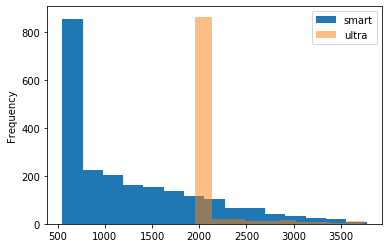

In [50]:
smart['revenue'].plot(kind='hist', bins=15, legend=True, label='smart')
ultra['revenue'].plot(kind='hist', legend=True, label='ultra',alpha=0.5)


На гистограмме видно что распределения находятся достаточно далеко друг от друга на числовой оси.   
Также можно с высокой долей уверенности говорить о том что среднее генеральной совокупности по тарифу Ultra не только не равно среднему генеральной совокупности Smart, но является значительно больше его. Это подтверждают как гистограммы, так и p-значение двусторонней гипотезы, если разделить его на два для проверки односторонней гипотезы то результат так же будет очень значительный.

---
Повторим процедуру для проверки гипотез о равенстве среднемесячной выручки абонентов проживающих в Москве и других городах.
Для начала сохраним две выборки в переменных:

In [51]:
moscow = df.query('city=="Москва"')
not_moscow = df.query('city!="Москва"')
print(len(moscow))
len(not_moscow)

611


2605

Выборка по абонентам из Москвы в 4 раза меньше выборки по остальным городам, соответственно при т-тесте также передадим параметру `equal_var` значение `False`.   
Но сначала проверим выборки на выбросы и удалим их:

count     611.000000
mean     1546.713584
std       752.088071
min       550.000000
25%       780.500000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: revenue, dtype: float64


3375.0

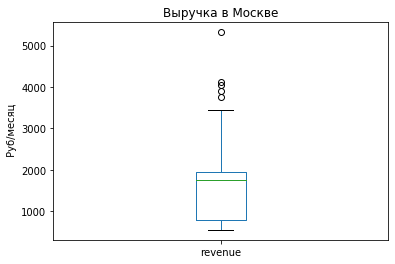

In [52]:
moscow['revenue'].plot(kind='box')
plt.ylabel(' Руб/месяц')
plt.title('Выручка в Москве')
print(moscow['revenue'].describe())
moscow['revenue'].quantile(0.99)

Перезапишем таблицу:

In [53]:
moscow=moscow.query('revenue<=3375')

count    2605.000000
mean     1524.725144
std       808.745680
min       550.000000
25%       750.000000
50%      1583.000000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64


3898.800000000001

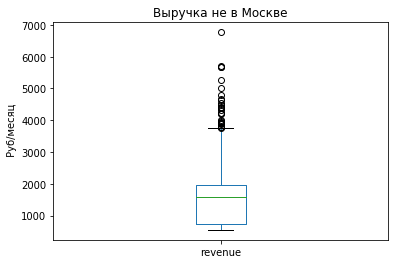

In [54]:
not_moscow['revenue'].plot(kind='box')
plt.ylabel(' Руб/месяц')
plt.title('Выручка не в Москве')
print(not_moscow['revenue'].describe())
not_moscow['revenue'].quantile(0.99)

Перезапишем таблицу:

In [55]:
not_moscow=not_moscow.query('revenue<=3898')

Данные готовы для метода ttest.  
Посмотрим на его результаты:

In [56]:
results = st.ttest_ind(moscow['revenue'], not_moscow['revenue'], equal_var=False)

alpha = .05 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.38119037579431136
Не получилось отвергнуть нулевую гипотезу


На этот раз нулевую гипотезу отвергнуть не удалось, результат p-значения слишком велик для этого. 
Но мы сравнивали общую массу абонентов обоих тарифов. Повторим процедуру, предварительно разделив выборки абонентов по тарифным планам и сравним уже пользователей разных городов с одинаковыми тарифами:

count     384.000000
mean     1221.236979
std       710.790314
min       550.000000
25%       550.000000
50%      1003.000000
75%      1673.000000
max      3375.000000
Name: revenue, dtype: float64


3207.2700000000004

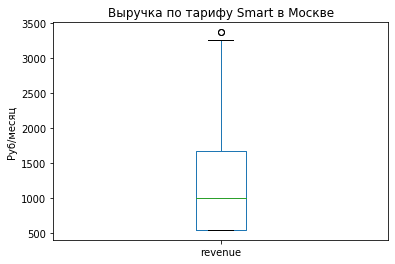

In [57]:
moscow.query('tariff=="smart"')['revenue'].plot(kind='box')
plt.ylabel('Руб/месяц')
plt.title('Выручка по тарифу Smart в Москве')
print(moscow.query('tariff=="smart"')['revenue'].describe())
moscow.query('tariff=="smart"')['revenue'].quantile(0.99)

Выброс по тарифу Smart не выглядит ярковыраженным и не влияет сильно на среднее, поэтому его можно оставить.

count    1825.000000
mean     1264.578630
std       754.398524
min       550.000000
25%       550.000000
50%      1012.000000
75%      1750.000000
max      3870.000000
Name: revenue, dtype: float64


3409.76

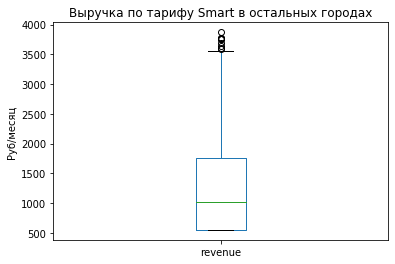

In [58]:
not_moscow.query('tariff=="smart"')['revenue'].plot(kind='box')
plt.ylabel('Руб/месяц')
plt.title('Выручка по тарифу Smart в остальных городах')
print(not_moscow.query('tariff=="smart"')['revenue'].describe())
not_moscow.query('tariff=="smart"')['revenue'].quantile(0.99)

Здесь максимальное значение сильно отличается от границы норальных и его лучше убрать. Запишем новую переменную:

In [59]:
not_moscow_smart = not_moscow.query('tariff=="smart" and revenue<=3409.76')

In [60]:
print(moscow.query('tariff=="ultra"')['revenue'].describe())
moscow.query('tariff=="ultra"')['revenue'].quantile(0.99)

count     221.000000
mean     2042.986425
std       263.728760
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      3300.000000
Name: revenue, dtype: float64


3150.0

Ситуация с тарифом Ultra в Мск такая же как с тарифом Smart, можно не убирать выбросы.

Посмотрим на тариф Ultra по остальным городам:

In [61]:
print(not_moscow.query('tariff=="ultra"')['revenue'].describe())
not_moscow.query('tariff=="ultra"')['revenue'].quantile(0.99)

count     753.000000
mean     2046.812749
std       317.931209
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      3750.000000
Name: revenue, dtype: float64


3672.0000000000027

Здесь максимальное значение недалеко ушло от границы нормальных, можно его оставить.
Проведём тест:

In [62]:
results = st.ttest_ind(moscow.query('tariff=="ultra"')['revenue'], not_moscow.query('tariff=="ultra"')['revenue'], equal_var=False)

alpha = .05 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.8567799293116486
Не получилось отвергнуть нулевую гипотезу


In [63]:
results = st.ttest_ind(moscow.query('tariff=="smart"')['revenue'], not_moscow_smart['revenue'], equal_var=False)

alpha = .05 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.6414584194645918
Не получилось отвергнуть нулевую гипотезу


Разбиение по тарифом также не дало оснований опровергнуть нулевую гипотезу: высокие p-значения дают основания предположить о близоски средних генеральных совокупностей друг к другу.

### Вывод

Во время предобработки данных были обнаружены нулевые значения в интернет - сессиях в таблице с одноименными значениями и разными названиями столбца с тарифом в таблицах с плозьвотелями и описаниями тарифов.

Причина появления нулевых значений может быть обусловлена ошибками сети, либо носить системный характер при выгрузке.  
Названия столбцов с тарифами запсаны по-разному скорее из-за человеческого фактора.
Данные со всех источников были объеденены в одну таблицу, предварительно количество основных показаелей в них было сгруппировано по месяцам.

В ходе исследовательского анализа были описаны распределения и описан портрет среднего пользователя - в среднем по тарифу Smart абоненты превышают лимит предоплаченного трафика, в остальном же обычно им хватает предоплаченных услуг связи.  
Распределения по тарифам smart более однородные, что можно частично объяснить большим количеством наблюдений в сравнении с тарифом Ultra, но также и с более активным пользованием услугами связи.



На этапе проверки гипотез удалось подтвердить гипотезу, что абоненты тарифа Ultra приносят компании больше прибыли, соответственно отделу можно дать реккомендацию при формировании рекламного бюджета сделать упор именно на этот тариф.  
Гипотеза о том, что абоненты, проживающие в Москве приносят неодинаковое количество выручки с абонентами, проживающими в других городах не подтвердилась.

Исследование можно считать завершенным.